<a href="https://colab.research.google.com/github/asddzxcc1856/2024-colab/blob/main/Heart_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-disease-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4755824%2F8062170%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240518%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240518T103915Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9378ed3a687646644d0a47f2c76bb3aa68edbc391e08c13827b58c8085c970d50b715c1af20dd051d3617c31b13fba541eb701a1b6f18aa45d0beccf48c0d4dba8ec0190ed5fa0a09a209988768c94d247ede87e360e8c7008b773ef60aaf1d24ed1ceda643c26f52bb9d8449b3b7921ac7d66b59d5563a4337c6e7c6f78a4240603c8243b4307611f472f04f17bc388daa0c9a835aa0d5dbb39fe105b4531e43ef4f02879fd11e6d56ebd1e5e875c4a46d2502da790e7f9a90ff6eef9da18dce4396325084100cf8d927781601aa55f516246c9fedb95058d36cd433a389f3e48e466b5e759f73c622027ac4777fd9f54486d2ecf9e42dd1cdf7892dc459fcb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 408466 bytes downloaded
Downloaded and uncompressed: heart-disease-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/documentation.pdf
/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv


# Overfitting  1.0 v.s. 0.86

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print(x.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
RFC = RandomForestClassifier(n_estimators=1000,criterion='gini')
RFC.fit(X_train,y_train.reshape(-1))
y_pred = RFC.predict(X_test)
accuracy_score(y_test, y_pred)
score_train = RFC.score(X_train, y_train)
score_test = RFC.score(X_test, y_test)
print(f"Train Accuracy: {score_train}")
print(f"Test Accuracy: {score_test}")

(1190, 10)
(1190, 1)
(892, 10)
(298, 10)
(892, 1)
(298, 1)
Train Accuracy: 1.0
Test Accuracy: 0.9060402684563759


# 貝氏優化找出最好的RandomForestClassifier

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
def objective(n_estimators, max_depth, min_samples_split, max_features):
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   max_features=min(max_features, 0.999),  # Fraction, must be <= 1.0
                                   random_state=42)

    return cross_val_score(model, X_train, y_train.reshape(-1), cv=3, scoring="accuracy").mean()
param = {
    'n_estimators': (1, 500),
    'max_depth': (1, 50),
    'min_samples_split': (2, 25),
    'max_features': (0.1, 0.999),
}

optimizer = BayesianOptimization(f=objective, pbounds=param, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)
best_params = optimizer.max['params']

best_params

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8363    | 19.35     | 0.9547    | 18.84     | 299.7     |
| 2         | 0.8565    | 8.645     | 0.2402    | 3.336     | 433.2     |
| 3         | 0.8531    | 30.45     | 0.7366    | 2.473     | 485.0     |
| 4         | 0.8554    | 41.79     | 0.2909    | 6.182     | 92.52     |
| 5         | 0.8531    | 15.91     | 0.5718    | 11.93     | 146.3     |
| 6         | 0.7074    | 1.451     | 0.1912    | 17.26     | 3.526     |
| 7         | 0.8711    | 50.0      | 0.1       | 2.0       | 216.0     |
| 8         | 0.8565    | 9.257     | 0.4568    | 4.901     | 431.8     |
| 9         | 0.8733    | 50.0      | 0.1       | 2.0       | 373.9     |
| 10        | 0.8229    | 50.0      | 0.999     | 25.0      | 159.4     |
| 11        | 0.8049    | 1.0       | 0.1       | 2.0       | 221.0     |
| 12        | 0.8027    | 1.0       | 

{'max_depth': 50.0,
 'max_features': 0.1,
 'min_samples_split': 2.0,
 'n_estimators': 373.9421457599694}

# 使用貝氏找出最好的參數給RandomForestClassifier使用

In [ ]:
RFmodel_Bayes = RandomForestClassifier(n_estimators=int(best_params['n_estimators']),
                                      max_depth=int(best_params['max_depth']),
                                      min_samples_split=int(best_params['min_samples_split']),
                                      max_features=best_params['max_features'],
                                      random_state=42)

# RandomForestClassifier貝氏的結果

In [ ]:
RFmodel_Bayes.fit(X_train,y_train.reshape(-1))
y_pred = RFmodel_Bayes.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("%.2f" % accuracy)

0.91


# index 0~334 中的第1個estimator

[Text(0.581477703434406, 0.9705882352941176, 'resting ecg <= 0.5\ngini = 0.5\nsamples = 570\nvalue = [435, 457]\nclass = no heart attack'),
 Text(0.32477471379950495, 0.9117647058823529, 'max heart rate <= 132.5\ngini = 0.497\nsamples = 334\nvalue = [283, 242]\nclass = heart attack'),
 Text(0.15532178217821782, 0.8529411764705882, 'fasting blood sugar <= 0.5\ngini = 0.353\nsamples = 130\nvalue = [46, 155]\nclass = no heart attack'),
 Text(0.10272277227722772, 0.7941176470588235, 'max heart rate <= 115.5\ngini = 0.396\nsamples = 100\nvalue = [41, 110]\nclass = no heart attack'),
 Text(0.04702970297029703, 0.7352941176470589, 'chest pain type <= 3.5\ngini = 0.337\nsamples = 47\nvalue = [15, 55]\nclass = no heart attack'),
 Text(0.019801980198019802, 0.6764705882352942, 'cholesterol <= 251.5\ngini = 0.499\nsamples = 13\nvalue = [9, 10]\nclass = no heart attack'),
 Text(0.009900990099009901, 0.6176470588235294, 'age <= 60.0\ngini = 0.32\nsamples = 7\nvalue = [8, 2]\nclass = heart attack'),

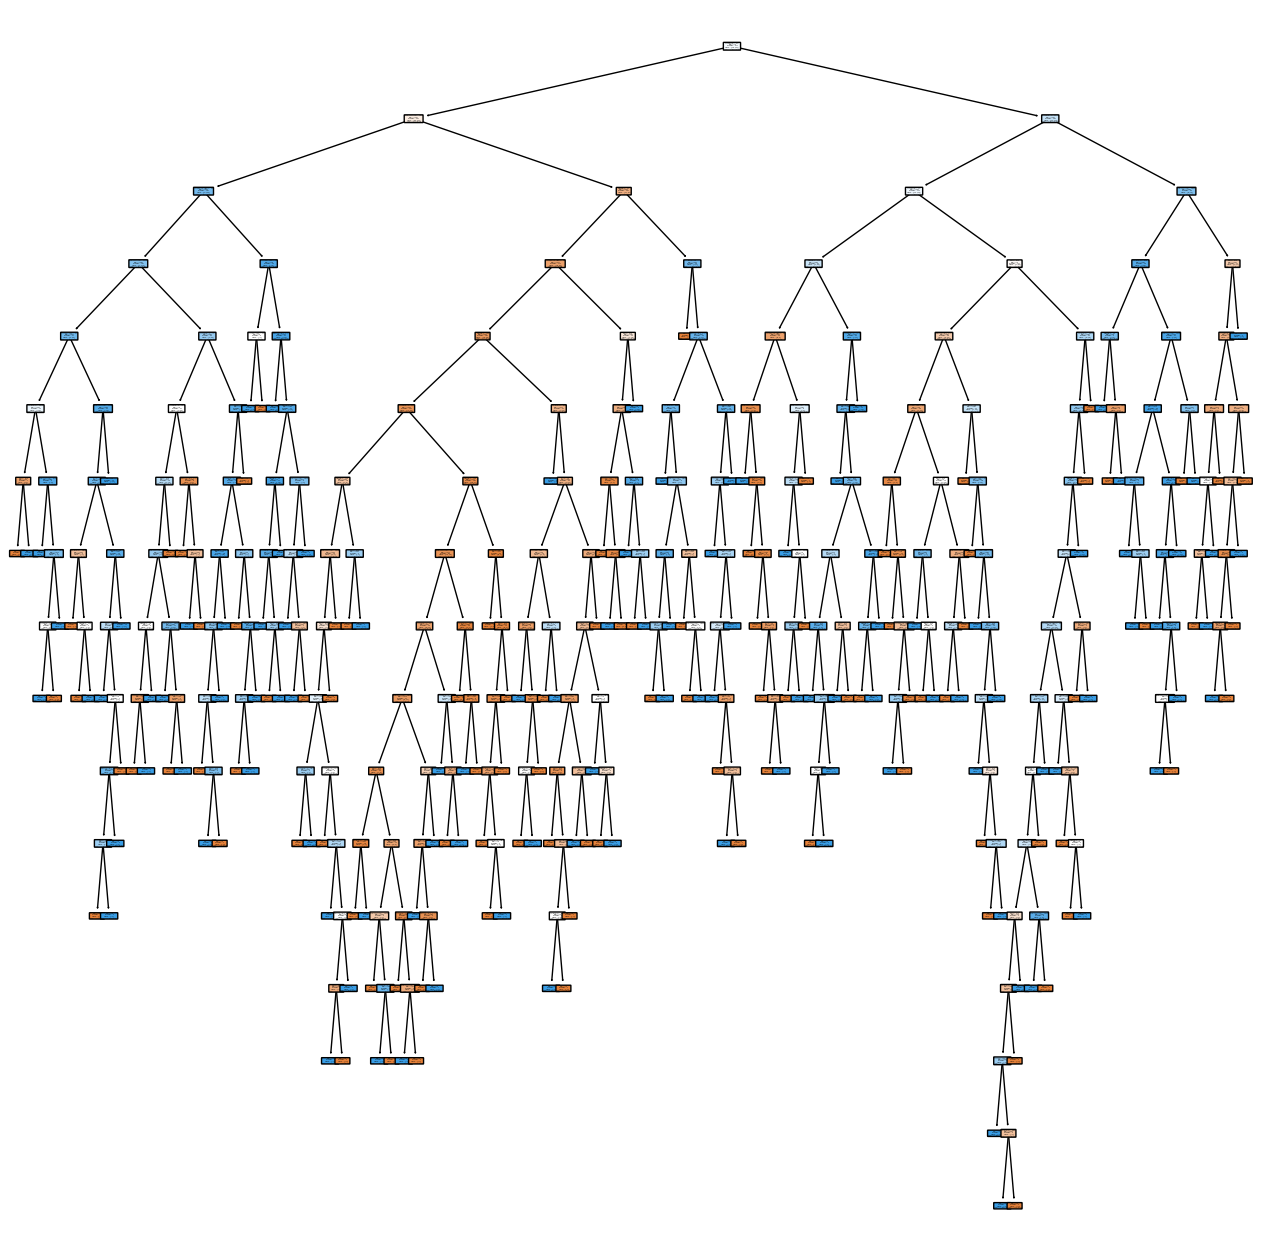

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16))
tree.plot_tree(RFmodel_Bayes.estimators_[1],
                feature_names = list(df_heart_attack_dataset.columns[:-2]),
                class_names = ['heart attack','no heart attack'],
                rounded = True,
                filled = True)

# LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
clf = LinearRegression()
clf.fit(X_train,y_train.reshape(-1))
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = clf.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
print("------Weight w0 to w12------")
print("w0",clf.intercept_)
for key,value in enumerate(clf.coef_):
  print("w" + str(key + 1),value)
print("----------------------------")

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 44.8 %
test set accuracy 47.5 %
------Weight w0 to w12------
w0 0.11002071192795854
w1 0.00345843867702917
w2 0.1609015844932806
w3 0.12266006818039189
w4 1.0746025719807206e-05
w5 -0.0005007619892305748
w6 0.13593626843099624
w7 0.01640111869396501
w8 -0.0028118095879597904
w9 0.2169106630582094
w10 0.09012668288745862
----------------------------


# Lasso (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
clf = Lasso(alpha=0.008)
clf.fit(X_train,y_train.reshape(-1))
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = clf.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
print("------Weight w0 to w12------")
print("w0",clf.intercept_)
for key,value in enumerate(clf.coef_):
  print("w" + str(key + 1),value)
print("----------------------------")

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 44.4 %
test set accuracy 46.1 %
------Weight w0 to w12------
w0 0.18778646593401127
w1 0.003817689832537963
w2 0.12424256987698995
w3 0.12044639272305206
w4 0.00018596081823705042
w5 -0.0005606858200694213
w6 0.08742703621679362
w7 0.008236417348491539
w8 -0.0031308480314924704
w9 0.18477014862112928
w10 0.08999128711731352
----------------------------


# Linear least squares with L2 regularization.

Minimizes the objective function:

# ||y - Xw||^2_2 + alpha * ||w||^2_2
This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
clf = Ridge(alpha=0.1)
clf.fit(X_train,y_train.reshape(-1))
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = clf.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
print("------Weight w0 to w12------")
print("w0",clf.intercept_)
for key,value in enumerate(clf.coef_):
  print("w" + str(key + 1),value)
print("----------------------------")

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 44.8 %
test set accuracy 47.5 %
------Weight w0 to w12------
w0 0.11021736814937994
w1 0.003458719988755712
w2 0.16082075959875353
w3 0.12266496636196723
w4 1.1169099127310602e-05
w5 -0.0005008930607627965
w6 0.1358409833616793
w7 0.016405196848792023
w8 -0.002812809419007586
w9 0.21678757456585138
w10 0.09013664433304336
----------------------------


# 無正規化，標準化 LogisticRegression

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 81.8 %
test set accuracy 84.6 %


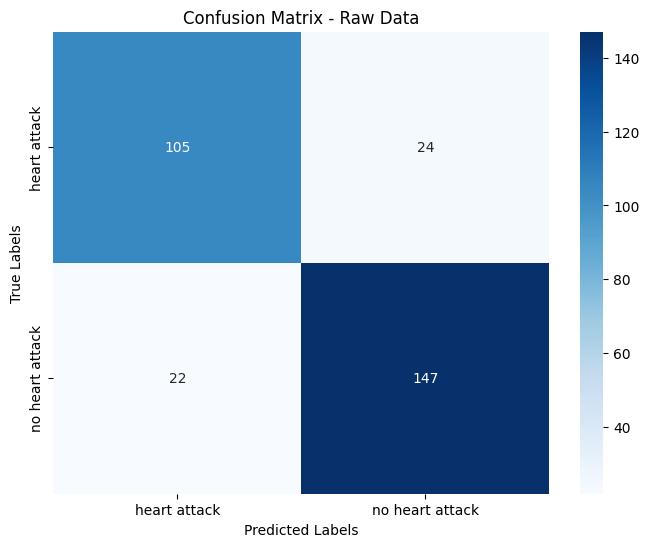

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# Logical Regression model
model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train, y_train.ravel())
y_pred_raw = model_raw.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = model_raw.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = model_raw.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 資料正規化 scaler_minmax = MinMaxScaler()

training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy with normalized data (Min-Max) 81.8 %
test set accuracy with normalized data (Min-Max) 82.9 %


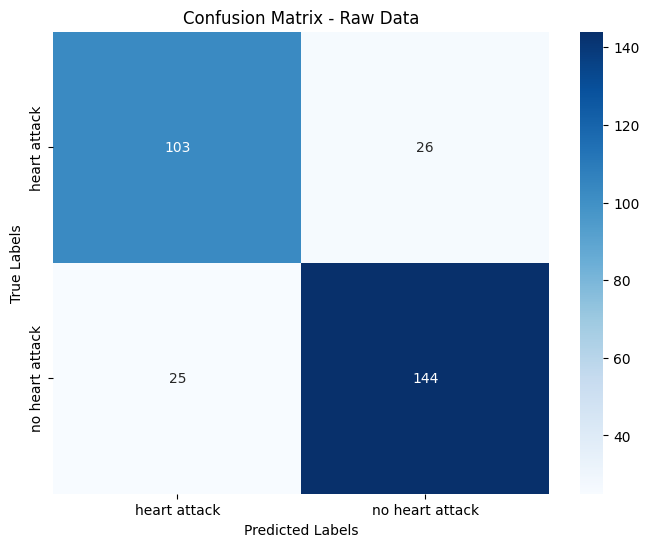

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# 正規化
scaler_minmax = MinMaxScaler()

X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)
# Logical Regression model

model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train_minmax, y_train.ravel())
y_pred_raw = model_raw.predict(X_test_minmax)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)


# 準確率
score = model_raw.score(X_train_minmax,y_train)
print("training set accuracy with normalized data (Min-Max) %.1f" % (score * 100),"%")
score = model_raw.score(X_test_minmax,y_test)
print("test set accuracy with normalized data (Min-Max) %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 資料標準化 scaler_SS = StandardScaler()

training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy standardized data (Z-Score) 82.2 %
test set accuracy standardized data (Z-Score) 84.9 %


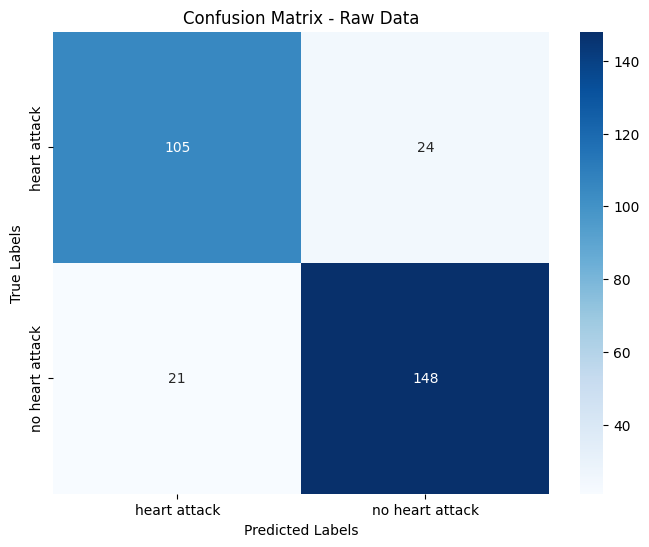

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# 正規化
scaler_SS = StandardScaler()

X_train_SS = scaler_SS.fit_transform(X_train)
X_test_SS = scaler_SS.transform(X_test)
# Logical Regression model

model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train_SS, y_train.ravel())
y_pred_raw = model_raw.predict(X_test_SS)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)


# 準確率
score = model_raw.score(X_train_SS,y_train)
print("training set accuracy standardized data (Z-Score) %.1f" % (score * 100),"%")
score = model_raw.score(X_test_SS,y_test)
print("test set accuracy standardized data (Z-Score) %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# SVM

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 81.7 %
test set accuracy 82.6 %


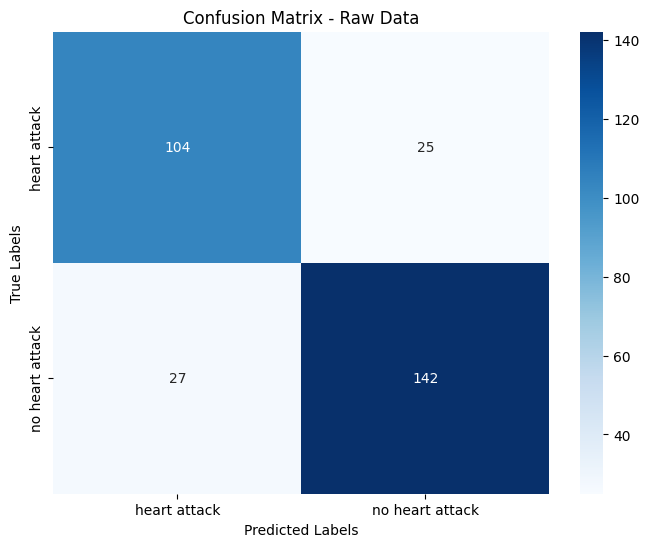

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# Logical Regression model
model_raw = SVC(kernel='linear', C=1.0)
model_raw.fit(X_train, y_train.ravel())
y_pred_raw = model_raw.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = model_raw.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = model_raw.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# RBF SVM

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 70.9 %
test set accuracy 72.8 %


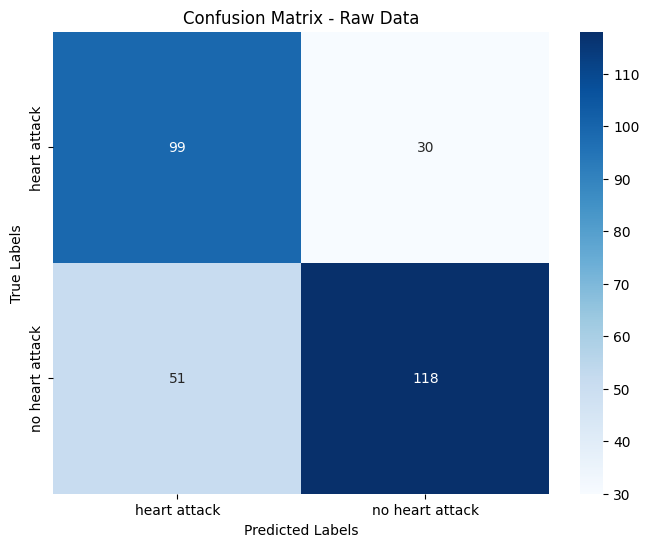

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)
# Logical Regression model
model_raw = SVC(kernel='rbf')
model_raw.fit(X_train, y_train.ravel())
y_pred_raw = model_raw.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = model_raw.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = model_raw.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# GridSearch SVM parameters

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.804 total time=   0.1s
[CV 2/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.749 total time=   0.1s
[CV 3/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.742 total time=   0.1s
[CV 4/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.747 total time=   0.1s
[CV 5/5] END C=0.001, gamma=0.01, kernel=linear;, score=0.719 total time=   0.1s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.514 total time=   0.1s
[CV 2/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.514 total time=   0.2s
[CV 3/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.517 total time=   0.2s
[CV 4/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.517 total time=   0.2s
[CV 5/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.517

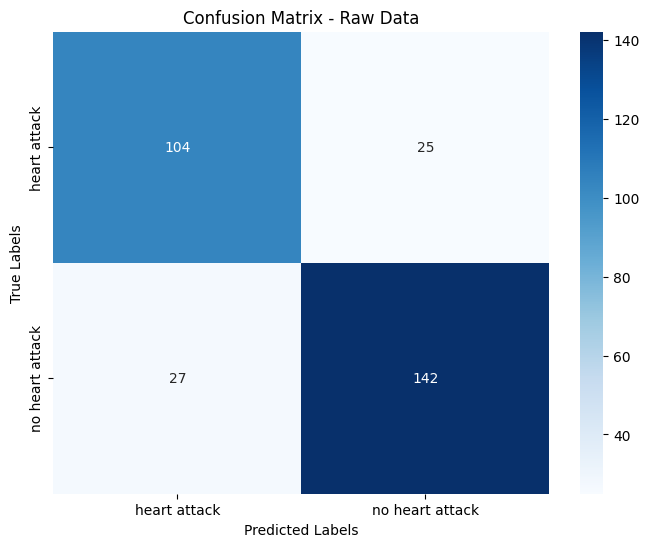

({'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}, 0.8171740631473228)


In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

model = SVC()

# 網格搜尋
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))


# AdaBoostClassifier

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.782 total time=   0.0s
[CV 2/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.754 total time=   0.0s
[CV 3/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.770 total time=   0.0s
[CV 4/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.787 total time=   0.0s
[CV 5/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2, random_state=42;, score=0.708 total time=   0.0s
[CV 1/5] END estimator=DecisionTreeClassifier(max_dep

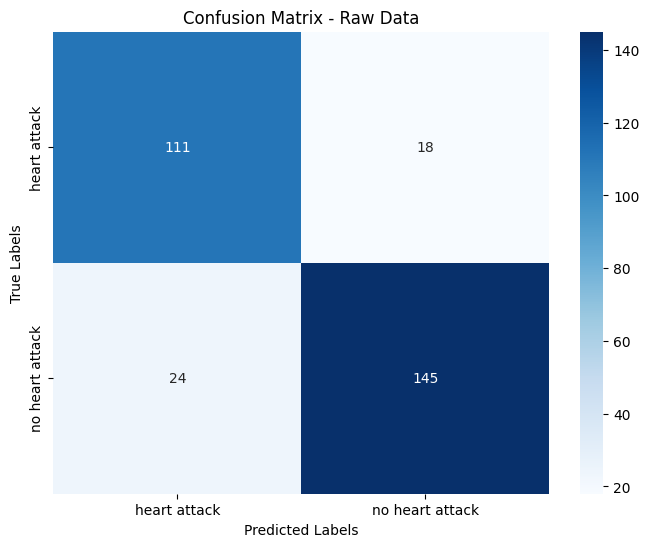

({'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1, 'n_estimators': 40, 'random_state': 42}, 0.8206201745025421)


In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

ada_dt = AdaBoostClassifier()

param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1)],
    'n_estimators': range(2,50),
    'learning_rate': [0.0001,0.001,0.01,0.1,1],
    'random_state': [42],
}

grid_search = GridSearchCV(estimator=ada_dt, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))

# VotingClassifier

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 89.5 %
test set accuracy 85.6 %


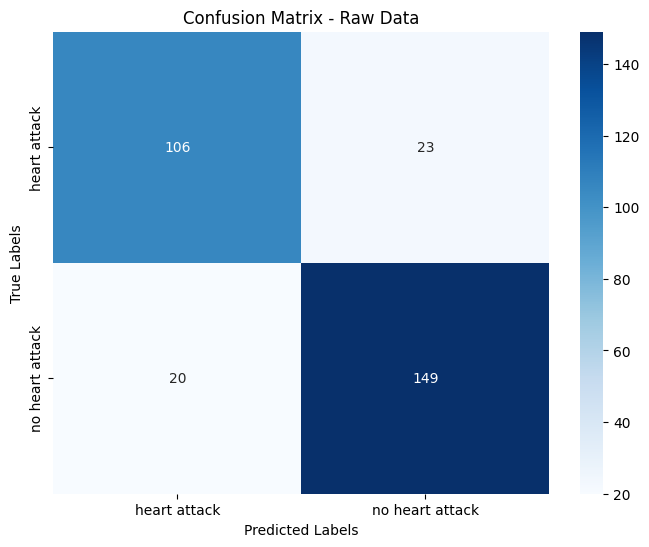

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

ensemble = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True, kernel='linear')),
        ('dt', DecisionTreeClassifier()),
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
    ],
    voting='soft',
    weights=[2, 1, 1]  # 模型銓重設定
)

ensemble.fit(X_train, y_train.ravel())
y_pred_raw = ensemble.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = ensemble.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = ensemble.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# StakingClassifier

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
training set accuracy 89.3 %
test set accuracy 85.2 %


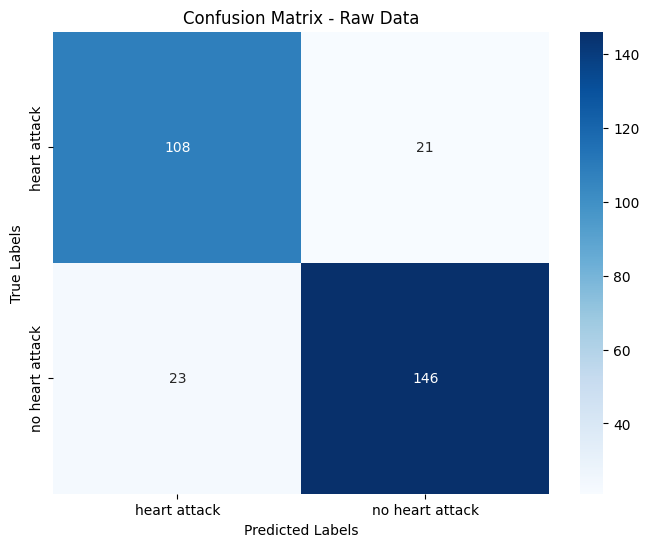

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

estimators = [
    ('svm', make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear'))),
    ('dt', DecisionTreeClassifier()),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
]

# Stacking模型
stacking_ensemble = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    stack_method='auto',
    passthrough=False
)

ensemble.fit(X_train, y_train.ravel())
y_pred_raw = ensemble.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = ensemble.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = ensemble.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# VotingClassifier with GridSearch

feature dataset (1190, 10)
target dataset (1190, 1)
training feature (892, 10)
test feature (298, 10)
training target (892, 1)
test target (298, 1)
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.860 total time=   0.4s
[CV 2/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.793 total time=   0.4s
[CV 3/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_estimator__max_iter=100, lr__logisticregression__C=0.1, svm__svc__C=0.1, svm__svc__degree=2, svm__svc__kernel=poly;, score=0.815 total time=   0.5s
[CV 4/5] END dt__max_depth=5, dt__min_samples_split=3, final_estimator__C=0.01, final_

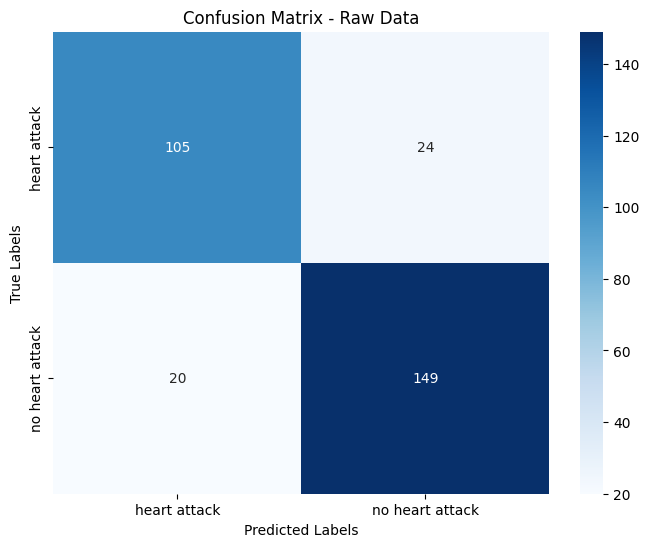

({'dt__max_depth': 10, 'dt__min_samples_split': 3, 'final_estimator__C': 1, 'final_estimator__max_iter': 200, 'lr__logisticregression__C': 0.1, 'svm__svc__C': 1, 'svm__svc__degree': 5, 'svm__svc__kernel': 'poly'}, 0.8463875462933903)


In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

param_grid = {
    'svm__svc__C': [0.1,1,10],
    'svm__svc__kernel': ['poly'],
    'svm__svc__degree': [2,3,5],
    'dt__min_samples_split': [3,4,5],
    'dt__max_depth': [5,10],
    'lr__logisticregression__C': [0.1,1],
    'final_estimator__C': [0.01,0.1,1],
    'final_estimator__max_iter': [100,200]
}

ensemble = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True, kernel='linear')),
        ('dt', DecisionTreeClassifier()),
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
    ],
    voting='soft',
    weights=[2, 1, 1]  # 模型銓重設定
)

grid_search = GridSearchCV(estimator=stacking_ensemble, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))

# StackingClassifier with GridSearch

In [ ]:
heart_disease_dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
x = heart_disease_dataset.values[:,:-2]
y = heart_disease_dataset.values[:,-1:]
print("feature dataset",x.shape)
print("target dataset",y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training feature",X_train.shape)
print("test feature",X_test.shape)
print("training target",y_train.shape)
print("test target",y_test.shape)

param_grid = {
    'svm__svc__C': [0.1,1,10],
    'svm__svc__kernel': ['poly'],
    'svm__svc__degree': [2,3,5],
    'dt__min_samples_split': [3,4,5],
    'dt__max_depth': [5,10],
    'lr__logisticregression__C': [0.1,1],
    'final_estimator__C': [0.01,0.1,1],
    'final_estimator__max_iter': [100,200]
}

estimators = [
    ('svm', make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear'))),
    ('dt', DecisionTreeClassifier()),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
]

# Stacking模型
stacking_ensemble = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    stack_method='auto',
    passthrough=False
)

grid_search = GridSearchCV(estimator=stacking_ensemble, param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())
y_pred_raw = grid_search.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)

# 正規化
#scaler_minmax = MinMaxScaler()

#X_train_minmax = scaler_minmax.fit_transform(X_train)
#X_test_minmax = scaler_minmax.transform(X_test)

# 準確率
score = grid_search.score(X_train,y_train)
print("training set accuracy %.1f" % (score * 100),"%")
score = grid_search.score(X_test,y_test)
print("test set accuracy %.1f" % (score * 100),"%")
#print(f"Accuracy with normalized data (Min-Max): {accuracy_minmax:.2f}")
#print(f"Accuracy with standardized data (Z-Score): {accuracy_standard:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=['heart attack','no heart attack'], yticklabels=['heart attack','no heart attack'])
plt.title('Confusion Matrix - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print((best_parameters, best_score))